<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Session_02_Regression_Assignment_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 02 - Regression - Assignment
_______________
name:

In [ ]:
%matplotlib inline
import numpy as np # numerical computations
import pandas as pd # data manipulations
import matplotlib.pyplot as plt # Plots
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns; sns.set(color_codes=True)

## 1. Wine quality

A lot of portugese Vinho Verde wines (http://www.vinhoverde.pt/en/) have been chemically analized. They have also been rated by a panel of wine experts.

The features comprise:
1- fixed acidity | 2 - volatile acidity | 3 - citric acid | 4 - residual sugar | 5 - chlorides | 6 - free sulfur dioxide | 7 - total sulfur dioxide | 8 - density | 9 - pH | 10 - sulphates |11 - alcohol

The target variable is the quality score

Apply regression to (as accurately as possible) predict the quality score of the wine from the chemical parameters.


In [ ]:
# Reading the dataset
dataset = pd.read_csv('winequality-red.csv',delimiter = ';') # pandas dataframe

dataset.shape

(1599, 12)

In [ ]:
# Show first rows of the dataset
dataset.head()


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Statistical analysis

- Compute an overview of the main statistical parameters. Use the dataset.describe() function.
- Check for missing values
- Check for outliers
- Make a correlation heatmap and discuss the results
- Make a pairplot and discuss the results.


In [ ]:
# Statistical description
dataset.describe()


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
# Removing outliers


from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
dataset.describe()




fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1451.000000       1451.000000  1451.000000     1451.000000   
mean        8.310062          0.522950     0.265382        2.387285   
std         1.646458          0.168531     0.190934        0.862078   
min         5.000000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.200000          0.630000     0.420000        2.600000   
max        13.500000          1.040000     0.790000        6.700000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1451.000000          1451.000000           1451.000000  1451.000000   
mean      0.081425            15.104755             43.735355     0.996710   
std       0.020966             9.309768             29.441284     0.001716   
min       0.038000             1.000000              6.000000     0.991500   
25%       0.070000             7.000000             21.000000     0.995600   
50%       0.079000            13.000000             36.000000     0.996700   
75%       0.089000            21.000000             58.000000     0.997800   
max       0.226000            47.000000            145.000000     1.002200   

                pH    sulphates      alcohol      quality  
count  1451.000000  1451.000000  1451.000000  1451.000000  
mean      3.315934     0.642584    10.421089     5.659545  
std       0.141096     0.129801     1.021588     0.781605  
min       2.880000     0.330000     8.500000     4.000000  
25%       3.220000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.720000    11.100000     6.000000  
max       3.750000     1.160000    13.600000     8.000000

<Axes: >

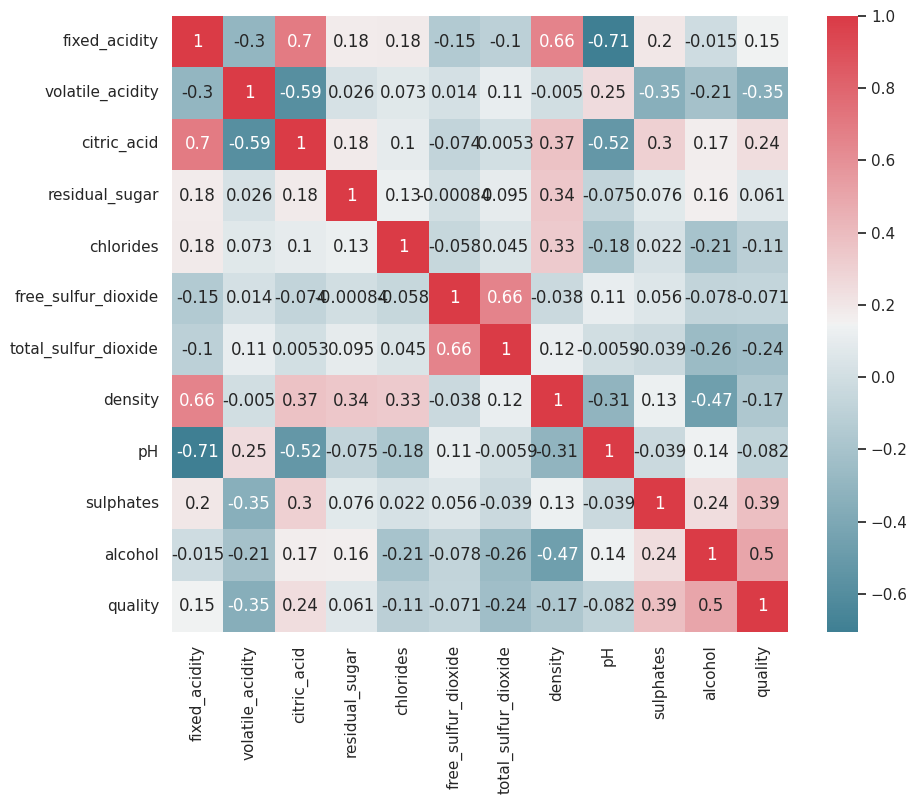

In [ ]:
# Correlation heatmap
dataset.corr()

f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

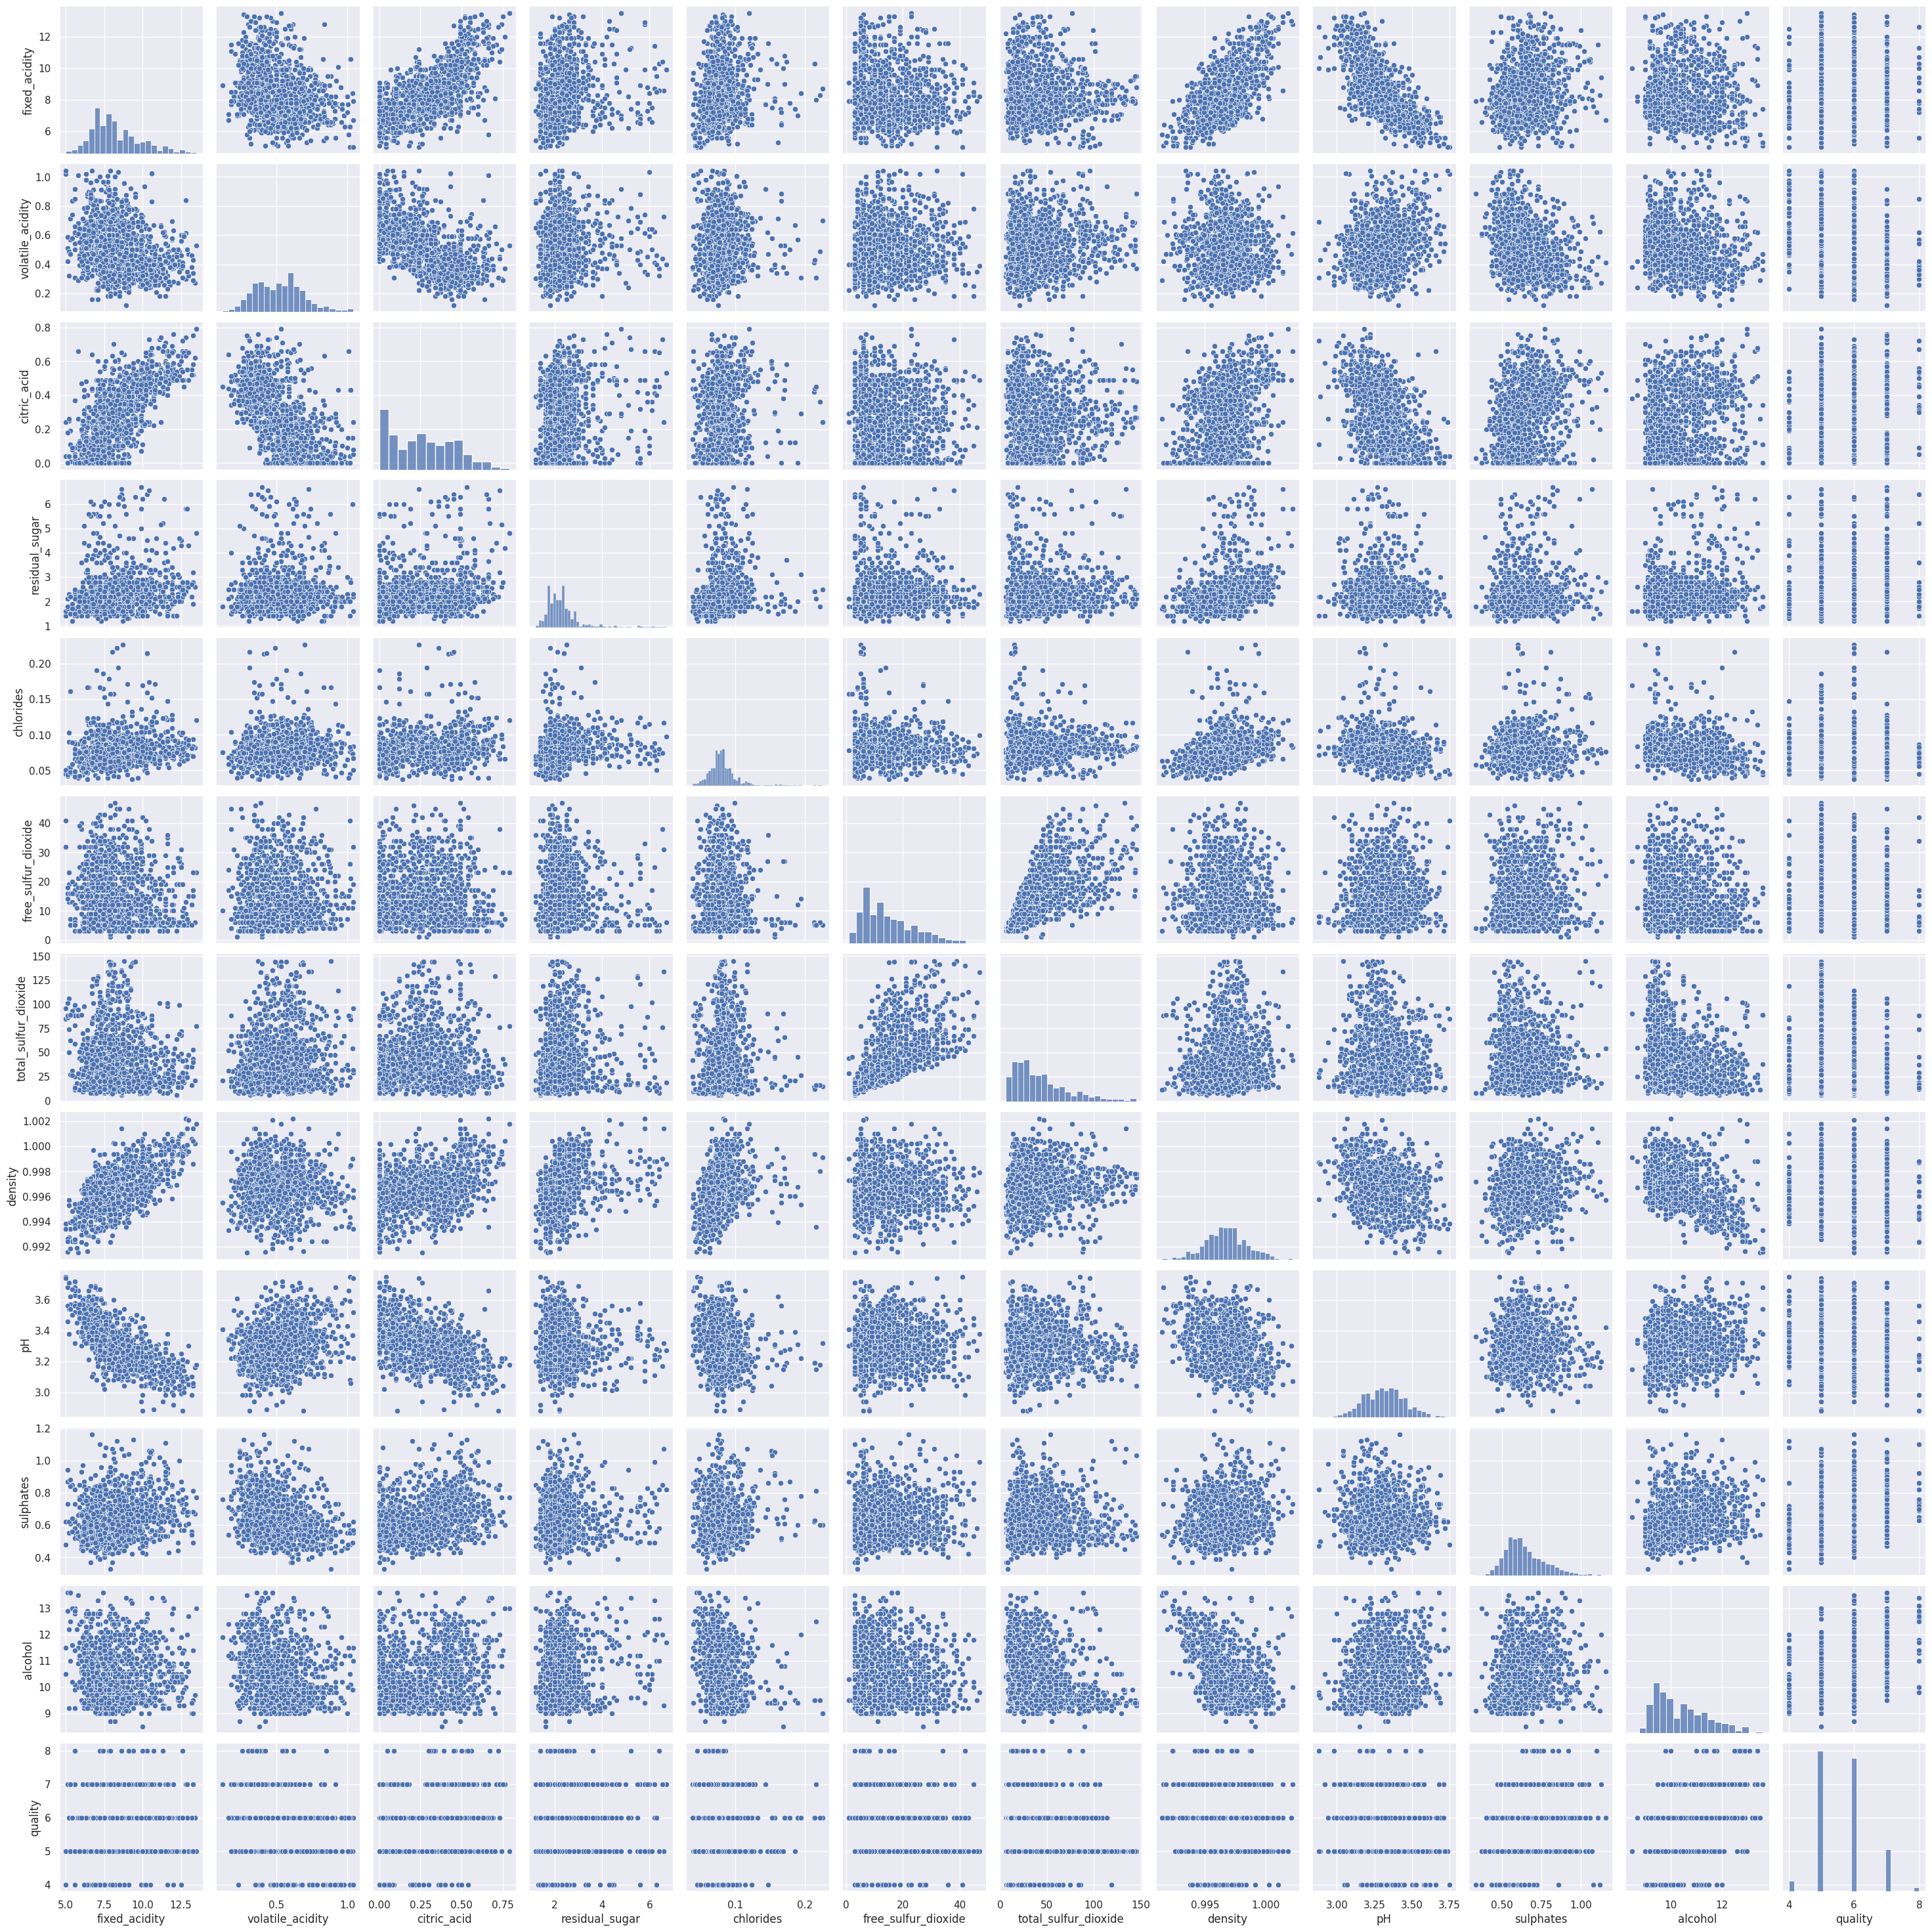

In [ ]:
# Pairplot
sns.pairplot(dataset);

### Splitting into training set and test set

In [ ]:
# Split into features and targets.
y = dataset['quality'].values
X = dataset.drop(['quality'],axis=1)


In [ ]:
# Split into training set and test set. Make sure that 30 percent
# of the wines end up in the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


(1119, 11)


In [ ]:
# Scaling the training set and test set.

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)





### Training the regression model

In [ ]:
# Training of the regression model
lregmodel = LinearRegression()
lregmodel.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Print and interpret the coëfficiënts and intercept of the model
print('model coefficients:',lregmodel.coef_)
print('\n model intercept:',lregmodel.intercept_)


model coefficients: [-0.01790929 -0.11616447 -0.01866793 -0.05320649 -0.01315397  0.02729519
 -0.10281881  0.04527868 -0.08963     0.1848026   0.3434816 ]

 model intercept: 5.647290640394087


### Testing and predicting
Predict the wine quality of a wine with the following chemical parameters:

fixed_acidity: 7.3 |
volatile_acidity: 0.70 | citric_acid: 0.00 | residual_sugar: 1.9 | chlorides: 0.079 | free_sulfur_dioxide: 11.0 | total_sulfur_dioxide: 34.0 | density: 0.9978 | pH: 3.51 | sulphates: 0.58 | alcohol: 9.4

In [ ]:
# Prediction of the quality
chemicalparameters =np.array([7.3, 0.70, 0.00, 1.9, 0.079, 11.0, 34.0, 0.9978, 3.51, 0.58,9.4])
quality = lregmodel.predict(chemicalparameters.reshape(1,-1))
print('Predicted wine  quality: ' , quality)


Predicted wine  quality:  [5.20400402]


Evaluate the model on the test set in terms of MAE, MSE and the $R^2$-score.

In [ ]:
# Evaluate the model in terms of MAE, MSE and R2-score on the test set
# Evaluation of the model
y_predicted = lregmodel.predict(X_test)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_predicted)
print('Mean Absolute Error:', MAE)

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_predicted)
print('Mean Squared Error:', MSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predicted)
print ('r2 score - test set =',lregmodel.score(X_test,y_test))
print ('r2 score - train set =',lregmodel.score(X_train,y_train))



Mean Absolute Error: 0.49842633651280044
Mean Squared Error: 0.41120057994520687
r2 score - test set = 0.34942751310619846
r2 score - train set = 0.3851200058729771


NameError: name 'y_predicted' is not defined

### Model optimization

Try to improve the performance of the model. In other words, try to improve the $R^2$-score of the model.
Possible options to improve the model performance are:
-  Adding higher-order features.
-  Think of new features that can be added to the dataset or computed from the existing features.
- Use Ridge regression and Lasso regression. Try to find a good value for alpha, the regularization parameter.
- Check for underfitting and overfitting.
- You can add higher-order features by means of the sklearn.preprocessing.PolynomialFeatures function. Don't go higher than a fourth-order polynomial.

In [ ]:
# Model optimization and hyperparameter tuning.

from sklearn.preprocessing import PolynomialFeatures


# Generate higher order features
degree = 2

poly = PolynomialFeatures(degree)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimension of X_train_poly: ',X_train_poly.shape)
print('dimension of X_test_poly: ',X_test_poly.shape)

print(' ')

# L2 regularization: Ridge regression
lregmodel_poly = Ridge(alpha=100,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)

print('R2 score of L2 - test set: ',lregmodel_poly.score(X_test_poly,y_test))
# R2 -score via L2 on the traing set
print('R2 score of L2 - training set: ',lregmodel_poly.score(X_train_poly,y_train))

print('')

# L1 regularization: Lasso regression
lregmodel_poly = Lasso(alpha=3,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)


print('R2 score of L1 - test set: ',lregmodel_poly.score(X_test_poly,y_test))

# R2 -score via L1 on trainingset
print('R2 score of L1 - training set: ',lregmodel_poly.score(X_train_poly,y_train))


dimension of X_train_poly:  (1015, 78)
dimension of X_test_poly:  (436, 78)
 
R2 score of L2 - test set:  0.3764967071060217
R2 score of L2 - training set:  0.45472144994829067

R2 score of L1 - test set:  -0.0026314497175914386
R2 score of L1 - training set:  0.0


Text(0, 0.5, 'R² Performance')

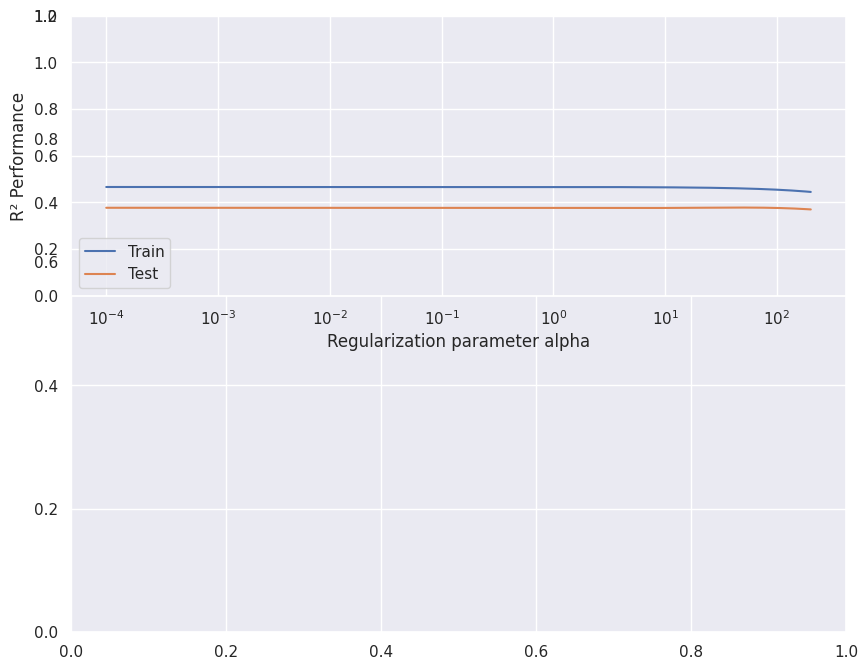

In [ ]:
# R² as a function of alpha

train_r2 = []
test_r2 = []


alphas = np.linspace(0.0001, 200, 500)

for alpha in alphas:
    lregmodel_poly = Ridge(alpha=alpha,tol=0.0001,fit_intercept=True)
    lregmodel_poly.fit(X_train_poly,y_train)
    test_r2.append(lregmodel_poly.score(X_test_poly,y_test))
    train_r2.append(lregmodel_poly.score(X_train_poly,y_train))


# Plot r2
f, ax = plt.subplots(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_r2, label='Train')
plt.semilogx(alphas, test_r2, label='Test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter alpha')
plt.ylabel('R² Performance')



# 2. Parkinson

Tracking Parkinson's disease symptom progression often uses the unified Parkinson's disease rating scale (UPDRS). But the tracking has to happen in the hospital by trained staff, which is very time-consuming for the patient and the hospital staff.

In 2010 a data set was published [1] that was composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.


> [1] A. Tsanas, M. A. Little, P. E. McSharry, L. O. Ramig (2010),
*Accurate telemonitoring of Parkinson's disease progression by non-invasive
speech tests*,
IEEE Transactions on Biomedical Engineering;57(4):884-93.

Here you can find a overview of the features:

|      feature      | Description |
|------------|-----|
| age | Subject age. |
| sex | Subject gender '0' - male, '1' - female.|
| test_time | Time since recruitment into the trial. The integer part is the number of days since recruitment. |
| Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP | Several measures of variation in fundamental frequency. |
| Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA | Several measures of variation in amplitude. |
| NHR,HNR | Two measures of the ratio of noise to tonal components in the voice. |
| RPDE | A nonlinear dynamical complexity measure. |
| DFA | Signal fractal scaling exponent. |
| PPE | A nonlinear measure of fundamental frequency variation. |
| motor_UPDRS | Clinician's motor Unified Parkinson's Disease Rating Scale (UPDRS) score, linearly interpolated. (target)|

The goal is to use multiple linear regression to predict the motor_UPDRS as reliably as possible.

### Reading the dataset

In [ ]:
# Read the dataset

dataset = pd.read_csv("parkinsons_updrs.csv")
dataset.head()

age  sex  test_time  motor_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
0   72    0     5.6431       28.199    0.00662     0.000034     0.00401   
1   72    0    12.6660       28.447    0.00300     0.000017     0.00132   
2   72    0    19.6810       28.695    0.00481     0.000025     0.00205   
3   72    0    25.6470       28.905    0.00528     0.000027     0.00191   
4   72    0    33.6420       29.187    0.00335     0.000020     0.00093   

   Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0      0.00317     0.01204  0.02565        0.230       0.01438       0.01309   
1      0.00150     0.00395  0.02024        0.179       0.00994       0.01072   
2      0.00208     0.00616  0.01675        0.181       0.00734       0.00844   
3      0.00264     0.00573  0.02309        0.327       0.01106       0.01265   
4      0.00130     0.00278  0.01703        0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  
0        0.01662      0.04314  0.014290  21.640  0.41888  0.54842  0.16006  
1        0.01689      0.02982  0.011112  27.183  0.43493  0.56477  0.10810  
2        0.01458      0.02202  0.020220  23.047  0.46222  0.54405  0.21014  
3        0.01963      0.03317  0.027837  24.445  0.48730  0.57794  0.33277  
4        0.01819      0.02036  0.011625  26.126  0.47188  0.56122  0.19361

What's the shape of the dataset?

In [ ]:
# shape of the dataset
dataset.shape

(5875, 20)

### Statistical pre-analysis

- Provide a summary table with the describe function of pandas.
- Check whether the dataset contains missing values. If it does, delete the rows with missing values.
- Is there any outlier data at first glance? Although this is not completely true for multidimensional correlated data, in this task you can consider outliers as feature values that are more than 5 standard deviations from the mean.
- Create a heatmap. Which features seem to have the most influence on the motor_UDPS? Are there features that are strongly correlated with each other? If you were to omit 3 features, which would they be? Explain why. With this question, the explanation is important.
- Make a pairplot, look at it carefully and formulate some conclusions. Are there any connections between what you see on the pairplot and on the correlation heatmap?



In [ ]:
# Statistical pre-analysis
dataset.describe()


age          sex    test_time  motor_UPDRS    Jitter(%)  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     64.804936     0.317787    92.863722    21.296229     0.006154   
std       8.821524     0.465656    53.445602     8.129282     0.005624   
min      36.000000     0.000000    -4.262500     5.037700     0.000830   
25%      58.000000     0.000000    46.847500    15.000000     0.003580   
50%      65.000000     0.000000    91.523000    20.871000     0.004900   
75%      72.000000     1.000000   138.445000    27.596500     0.006800   
max      85.000000     1.000000   215.490000    39.511000     0.099990   

       Jitter(Abs)   Jitter:RAP  Jitter:PPQ5   Jitter:DDP      Shimmer  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean      0.000044     0.002987     0.003277     0.008962     0.034035   
std       0.000036     0.003124     0.003732     0.009371     0.025835   
min       0.000002     0.000330     0.000430     0.000980     0.003060   
25%       0.000022     0.001580     0.001820     0.004730     0.019120   
50%       0.000035     0.002250     0.002490     0.006750     0.027510   
75%       0.000053     0.003290     0.003460     0.009870     0.039750   
max       0.000446     0.057540     0.069560     0.172630     0.268630   

       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
count  5875.000000   5875.000000   5875.000000    5875.000000  5875.000000   
mean      0.310960      0.017156      0.020144       0.027481     0.051467   
std       0.230254      0.013237      0.016664       0.019986     0.039711   
min       0.026000      0.001610      0.001940       0.002490     0.004840   
25%       0.175000      0.009280      0.010790       0.015665     0.027830   
50%       0.253000      0.013700      0.015940       0.022710     0.041110   
75%       0.365000      0.020575      0.023755       0.032715     0.061735   
max       2.107000      0.162670      0.167020       0.275460     0.488020   

               NHR          HNR         RPDE          DFA          PPE  
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  
mean      0.032120    21.679495     0.541473     0.653240     0.219589  
std       0.059692     4.291096     0.100986     0.070902     0.091498  
min       0.000286     1.659000     0.151020     0.514040     0.021983  
25%       0.010955    19.406000     0.469785     0.596180     0.156340  
50%       0.018448    21.920000     0.542250     0.643600     0.205500  
75%       0.031463    24.444000     0.614045     0.711335     0.264490  
max       0.748260    37.875000     0.966080     0.865600     0.731730

In [ ]:
dataset.isnull().sum()

age              0
sex              0
test_time        0
motor_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [ ]:
# Removing outliers


from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 5).all(axis=1)]
dataset.describe()


age          sex    test_time  motor_UPDRS    Jitter(%)  \
count  5761.000000  5761.000000  5761.000000  5761.000000  5761.000000   
mean     64.852283     0.308801    93.111904    21.265872     0.005628   
std       8.866950     0.462039    53.462535     8.187365     0.003300   
min      36.000000     0.000000    -4.262500     5.037700     0.000830   
25%      58.000000     0.000000    47.371000    14.860000     0.003550   
50%      65.000000     0.000000    91.756000    20.682000     0.004840   
75%      72.000000     1.000000   138.470000    27.663000     0.006630   
max      85.000000     1.000000   215.490000    39.511000     0.029950   

       Jitter(Abs)   Jitter:RAP  Jitter:PPQ5   Jitter:DDP      Shimmer  \
count  5761.000000  5761.000000  5761.000000  5761.000000  5761.000000   
mean      0.000041     0.002704     0.002903     0.008112     0.031599   
std       0.000028     0.001841     0.001823     0.005525     0.018498   
min       0.000002     0.000330     0.000430     0.000980     0.003060   
25%       0.000022     0.001560     0.001810     0.004690     0.019000   
50%       0.000034     0.002220     0.002450     0.006660     0.027180   
75%       0.000052     0.003210     0.003400     0.009630     0.038890   
max       0.000223     0.018510     0.021860     0.055520     0.156580   

       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
count  5761.000000   5761.000000   5761.000000    5761.000000  5761.000000   
mean      0.289647      0.016010      0.018555       0.025791     0.048031   
std       0.168913      0.010039      0.011504       0.014987     0.030117   
min       0.026000      0.001610      0.001940       0.002490     0.004840   
25%       0.174000      0.009190      0.010720       0.015590     0.027580   
50%       0.249000      0.013460      0.015690       0.022410     0.040380   
75%       0.356000      0.020020      0.023120       0.032070     0.060060   
max       1.398000      0.082280      0.098440       0.124700     0.246830   

               NHR          HNR         RPDE          DFA          PPE  
count  5761.000000  5761.000000  5761.000000  5761.000000  5761.000000  
mean      0.025563    21.963827     0.538004     0.653520     0.214875  
std       0.028644     3.784957     0.098483     0.070906     0.084449  
min       0.000286     6.237000     0.151020     0.514040     0.021983  
25%       0.010784    19.557000     0.468280     0.596010     0.155230  
50%       0.018116    22.010000     0.540050     0.644820     0.203540  
75%       0.030442    24.501000     0.609750     0.711740     0.260070  
max       0.330500    37.875000     0.966080     0.836270     0.603120

<Axes: >

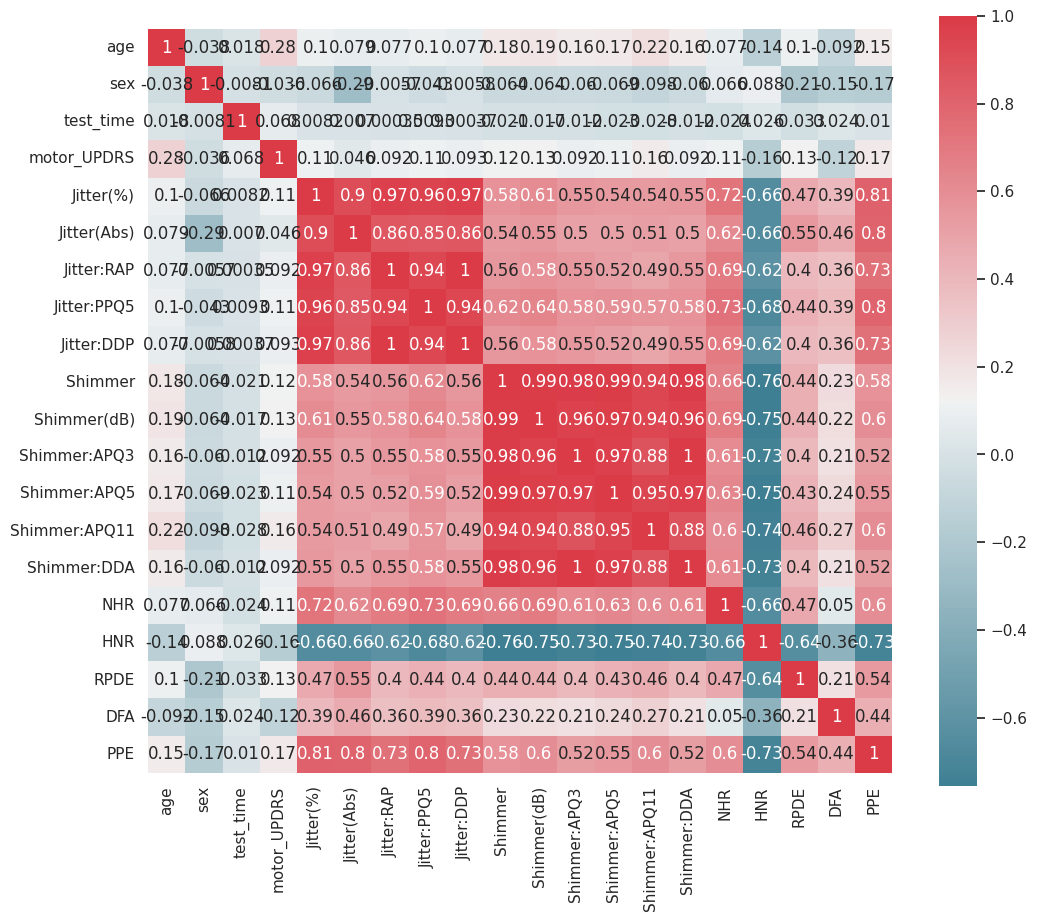

In [ ]:
# Correlation heatmap
dataset.corr()

f, ax = plt.subplots(figsize=(12, 10))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

age and hnr and dfa have the most influence on motor_updrs

In [ ]:
dataset.describe()

age          sex    test_time  motor_UPDRS    Jitter(%)  \
count  5761.000000  5761.000000  5761.000000  5761.000000  5761.000000   
mean     64.852283     0.308801    93.111904    21.265872     0.005628   
std       8.866950     0.462039    53.462535     8.187365     0.003300   
min      36.000000     0.000000    -4.262500     5.037700     0.000830   
25%      58.000000     0.000000    47.371000    14.860000     0.003550   
50%      65.000000     0.000000    91.756000    20.682000     0.004840   
75%      72.000000     1.000000   138.470000    27.663000     0.006630   
max      85.000000     1.000000   215.490000    39.511000     0.029950   

       Jitter(Abs)   Jitter:RAP  Jitter:PPQ5   Jitter:DDP      Shimmer  \
count  5761.000000  5761.000000  5761.000000  5761.000000  5761.000000   
mean      0.000041     0.002704     0.002903     0.008112     0.031599   
std       0.000028     0.001841     0.001823     0.005525     0.018498   
min       0.000002     0.000330     0.000430     0.000980     0.003060   
25%       0.000022     0.001560     0.001810     0.004690     0.019000   
50%       0.000034     0.002220     0.002450     0.006660     0.027180   
75%       0.000052     0.003210     0.003400     0.009630     0.038890   
max       0.000223     0.018510     0.021860     0.055520     0.156580   

       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
count  5761.000000   5761.000000   5761.000000    5761.000000  5761.000000   
mean      0.289647      0.016010      0.018555       0.025791     0.048031   
std       0.168913      0.010039      0.011504       0.014987     0.030117   
min       0.026000      0.001610      0.001940       0.002490     0.004840   
25%       0.174000      0.009190      0.010720       0.015590     0.027580   
50%       0.249000      0.013460      0.015690       0.022410     0.040380   
75%       0.356000      0.020020      0.023120       0.032070     0.060060   
max       1.398000      0.082280      0.098440       0.124700     0.246830   

               NHR          HNR         RPDE          DFA          PPE  
count  5761.000000  5761.000000  5761.000000  5761.000000  5761.000000  
mean      0.025563    21.963827     0.538004     0.653520     0.214875  
std       0.028644     3.784957     0.098483     0.070906     0.084449  
min       0.000286     6.237000     0.151020     0.514040     0.021983  
25%       0.010784    19.557000     0.468280     0.596010     0.155230  
50%       0.018116    22.010000     0.540050     0.644820     0.203540  
75%       0.030442    24.501000     0.609750     0.711740     0.260070  
max       0.330500    37.875000     0.966080     0.836270     0.603120

if i have to omit three features it would be sex ,test time and hnr these have little to no correlation with the other variables

### Splitting up the dataset

Split the dataset into features X and targets y. Then you can split the dataset into a training set and a test set. Use the function train_test_split from Sklearn (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Make sure that 20 percent of the dataset ends up in the test set.

Visualise your features with a boxplot, are there any features present that are on a completly different scale, does this dataset need to be normalised?
Scale/normalise the training set and the test set with a standards scaler. Try later also with a robustscaler.
Explain what the difference is between the standardscaler and the robustscaler.
The labels do not need to be scaled or normalized.

In [ ]:
# splitting into target and features
y = dataset['motor_UPDRS'].values
X = dataset.drop(['motor_UPDRS'],axis=1)


<Axes: xlabel='motor_UPDRS'>

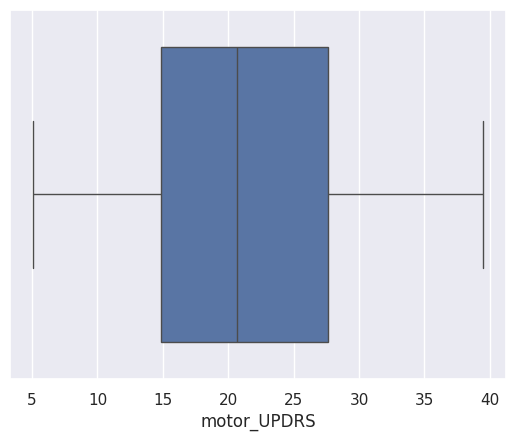

In [ ]:
# Visualise your features with a boxplot
sns.boxplot(x="motor_UPDRS",data=dataset)

In [ ]:
# Splitting the dataset into a train- and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [ ]:
# Scaling the data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training the regression model

Train a regression model via linear_model.LinearRegression(). Then print and interpret the model coefficients.

In [ ]:
# Training the regression model
lregmodel = LinearRegression()
lregmodel.fit(X_train,y_train)


LinearRegression()

In [ ]:
# print the coefficients and the intercept of the model
print('model coefficients:',lregmodel.coef_)
print('\n model intercept:',lregmodel.intercept_)

model coefficients: [   1.57692964   -1.02777735    0.70641389    2.52757836   -4.32139308
  -47.36614898   -0.52572775   49.03002839    5.31711367   -2.03482269
  272.03318786   -2.83522809    2.47080345 -275.26222133   -0.72007607
   -1.64666886    0.29340557   -1.6801267     1.34139626]

 model intercept: 21.272957573784748


### Model optimization
Try to improve the performance of the model. In other words, lower the MAE and the MSE and increase the $R^2$ score.
Possible options are:
- Adding higher order features (manually). Justify why you would use certain higher order features. Look for example at the pairplot or the correlation heatmap (look for non-linearities).
- Derive additional features from existing features.
- Apply regularisation via Ridge regression and Lasso regression. Always look for a good value for alpha.
- Always check if there is overfitting or underfitting. Do this by comparing the performance on the training set with the performance on the test set.
- Add higher order features automatically via sklearn.preprocessing.PolynomialFeatures. Do not go higher than 3rd order. The number of features increases exponentially with the order, with the result that the model can no longer be trained within an acceptable time.

Always motivate the made decisions and evaluate the model with the test set. What is the best performance you can achieve? **Discuss the final result**.

In [ ]:
# Evaluate the model in terms of MAE, MSE and R2-score on the test set
# Evaluation of the model
y_predicted = lregmodel.predict(X_test)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_predicted)
print('Mean Absolute Error:', MAE)

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_predicted)
print('Mean Squared Error:', MSE)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predicted)
print ('r2 score - test set =',lregmodel.score(X_test,y_test))
print ('r2 score - train set =',lregmodel.score(X_train,y_train))



Mean Absolute Error: 6.411060817005898
Mean Squared Error: 57.41862526615467
r2 score - test set = 0.14873440200824695
r2 score - train set = 0.15081627206715775


In [ ]:
# Model optimization
# Model optimization and hyperparameter tuning.

from sklearn.preprocessing import PolynomialFeatures


# Generate higher order features
degree = 3

poly = PolynomialFeatures(degree)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimension of X_train_poly: ',X_train_poly.shape)
print('dimension of X_test_poly: ',X_test_poly.shape)

print(' ')

# L2 regularization: Ridge regression
lregmodel_poly = Ridge(alpha=20,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)

print('R2 score of L2 - test set: ',lregmodel_poly.score(X_test_poly,y_test))
# R2 -score via L2 on the traing set
print('R2 score of L2 - training set: ',lregmodel_poly.score(X_train_poly,y_train))

print('')

# L1 regularization: Lasso regression
lregmodel_poly = Lasso(alpha=3,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)


print('R2 score of L1 - test set: ',lregmodel_poly.score(X_test_poly,y_test))

# R2 -score via L1 on trainingset
print('R2 score of L1 - training set: ',lregmodel_poly.score(X_train_poly,y_train))


dimension of X_train_poly:  (4608, 1540)
dimension of X_test_poly:  (1153, 1540)
 
R2 score of L2 - test set:  0.24749474597072607
R2 score of L2 - training set:  0.6349860164557464

R2 score of L1 - test set:  -0.0003821876632899013
R2 score of L1 - training set:  0.0060523026007562875


Text(0, 0.5, 'R² Performance')

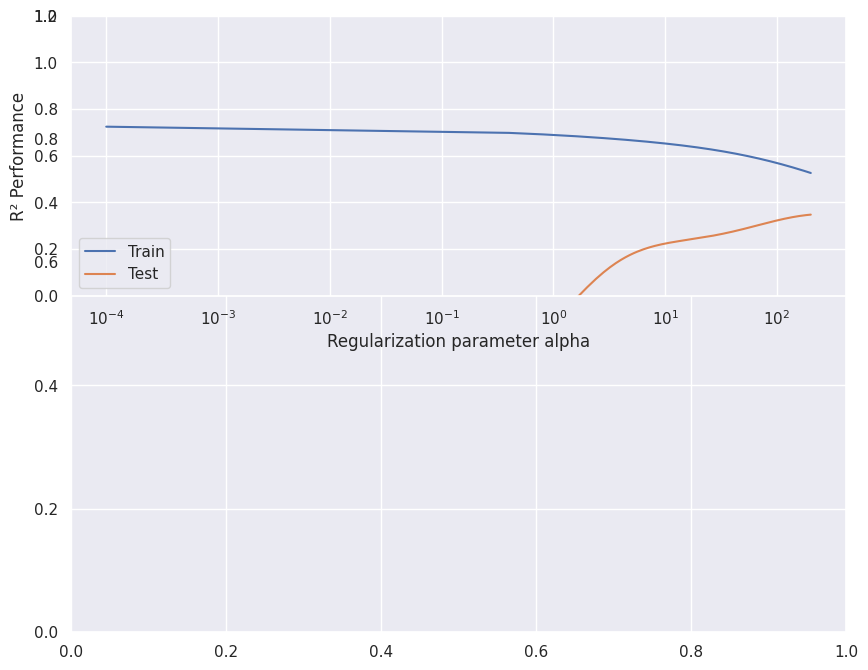

In [ ]:
# R² as a function of alpha

train_r2 = []
test_r2 = []


alphas = np.linspace(0.0001, 200, 500)

for alpha in alphas:
    lregmodel_poly = Ridge(alpha=alpha,tol=0.0001,fit_intercept=True)
    lregmodel_poly.fit(X_train_poly,y_train)
    test_r2.append(lregmodel_poly.score(X_test_poly,y_test))
    train_r2.append(lregmodel_poly.score(X_train_poly,y_train))


# Plot r2
f, ax = plt.subplots(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_r2, label='Train')
plt.semilogx(alphas, test_r2, label='Test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter alpha')
plt.ylabel('R² Performance')



# 3. Car prices


In this exercise, you will work on a machine learning problem in which you will predict the price of used cars. The dataset provided contains information about different car listings including features such as make, model, year, power, fuel type, transmission type, age, mileage. You will apply regression techniques to build a predictive model capable of estimating the price of the cars as accurately as possible.

## 3.1. Data analysis


Load the dataset and perform exploratory data analysis (EDA) to understand its structure, feature distributions, missing values, and correlations.
Visualize relationships between features and the target variable (car price) using scatter plots, histograms, boxplots and correlation matrices.

For example:

- Number of samples
- Check for missing values
- Check for (extreme) outlier
- Histrogram of the car prices
- Distribution of the car brands
- Distribution of the fuel consumption
- Scatterplot of the price and the fuel consumption
- Distribution of the mileage
- Scatterplot of the price and the milage
- Boxplot of the price per brand
- Boxplot of the price per color
- Scatterplot of the price and age
- Boxplot of the price per transmission_type
- Correlation heatmap


**Write down some conclusions:**
- What is number of missing values? Is this problematic? Which strategy will you choose to deal with these missing values? Impute missing values of listwise deletion.
- Are there any redundant variables?
- What are the important features?


## 3.2. Data preprocessing
- Remove the offer_description feature from the dataset
- Handle missing values appropriately (e.g., imputation, removal).
- Encode categorical variables if necessary (e.g., one-hot encoding).
- Scale numerical features to ensure they are on a similar scale.

## 3.3. Feature engineering

- Extract relevant features from existing ones if necessary (if applicable).
- Create new features that might enhance prediction (e.g., calculate car age from year of manufacture).

## 3.4. Model building

- Split the dataset into features and targets
- Split the dataset into training and testing sets.
- Choose appropriate regression algorithms (e.g., Linear Regression, Ridge Regression, Lasso Regression).
- Train multiple regression models using the training data.
- Evaluate the models using appropriate evaluation metrics (e.g., Mean Squared Error, R-squared).

## 3.5. Model Optimization:
- Fine-tune hyperparameters of the models

## 3.6. Model Evaluation:
- Compare the performance of different models based on evaluation metrics.
- Select the best-performing model for further analysis.


## 3.7. Prediction:
- Go to a second-hand car website and choose a car. Predict the price of that car and compare it to the announced price on the website.

## 3.8. Conclusion:
Summarize findings and discuss the effectiveness of the predictive model.





In [ ]:
dataset = pd.read_csv('carprices.csv')
dataset.head()

brand              model  color  year  price_in_euro  power_kw  \
0  alfa-romeo     Alfa Romeo GTV    red  1995           1300     148.0   
1  alfa-romeo     Alfa Romeo 164  black  1995          24900     191.0   
2  alfa-romeo  Alfa Romeo Spider  black  1995           5900     110.0   
3  alfa-romeo  Alfa Romeo Spider  black  1995           4900     110.0   
4  alfa-romeo     Alfa Romeo 164    red  1996          17950     132.0   

   power_ps transmission_type fuel_type  fuel_consumption_l_100km  \
0     201.0            Manual    Petrol                      10.9   
1     260.0            Manual    Petrol                       NaN   
2     150.0           Unknown    Petrol                       NaN   
3     150.0            Manual    Petrol                       9.5   
4     179.0            Manual    Petrol                       7.2   

   mileage_in_km                      offer_description  
0       160500.0                              2.0 V6 TB  
1       190000.0                    Q4 Allrad, 3.2L GTA  
2       129000.0                          ALFA ROME 916  
3       189500.0                   2.0 16V Twin Spark L  
4        96127.0  3.0i Super V6, absoluter Topzustand !

In [ ]:
# Solution
dataset.shape

(249173, 12)

In [ ]:
# Show first rows of the dataset
dataset.head()

brand              model  color  year  price_in_euro  power_kw  \
0  alfa-romeo     Alfa Romeo GTV    red  1995           1300     148.0   
1  alfa-romeo     Alfa Romeo 164  black  1995          24900     191.0   
2  alfa-romeo  Alfa Romeo Spider  black  1995           5900     110.0   
3  alfa-romeo  Alfa Romeo Spider  black  1995           4900     110.0   
4  alfa-romeo     Alfa Romeo 164    red  1996          17950     132.0   

   power_ps transmission_type fuel_type  fuel_consumption_l_100km  \
0     201.0            Manual    Petrol                      10.9   
1     260.0            Manual    Petrol                       NaN   
2     150.0           Unknown    Petrol                       NaN   
3     150.0            Manual    Petrol                       9.5   
4     179.0            Manual    Petrol                       7.2   

   mileage_in_km                      offer_description  
0       160500.0                              2.0 V6 TB  
1       190000.0                    Q4 Allrad, 3.2L GTA  
2       129000.0                          ALFA ROME 916  
3       189500.0                   2.0 16V Twin Spark L  
4        96127.0  3.0i Super V6, absoluter Topzustand !

In [ ]:
# Statistical description
dataset.describe()


year  price_in_euro       power_kw       power_ps  \
count  249173.000000   2.491730e+05  249046.000000  249046.000000   
mean     2016.243196   2.609322e+04     126.168523     171.622018   
std         5.463742   3.691015e+04      71.960123      97.811024   
min      1995.000000   1.200000e+02       1.000000       1.000000   
25%      2013.000000   1.199000e+04      82.000000     111.000000   
50%      2018.000000   1.988000e+04     110.000000     150.000000   
75%      2020.000000   2.992500e+04     140.000000     190.000000   
max      2023.000000   5.890500e+06     735.000000     999.000000   

       fuel_consumption_l_100km  mileage_in_km  
count             222300.000000   2.491110e+05  
mean                   6.085446   8.566723e+04  
std                    2.582295   7.877597e+04  
min                    0.000000   0.000000e+00  
25%                    4.900000   2.503100e+04  
50%                    5.700000   6.800000e+04  
75%                    6.800000   1.270000e+05  
max                  173.000000   3.800000e+06

In [ ]:
dataset.isnull().sum()

brand                           0
model                           0
color                         166
year                            0
price_in_euro                   0
power_kw                      127
power_ps                      127
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
mileage_in_km                  62
offer_description               0
dtype: int64

In [ ]:
# listwise deletion
# listwise deletion
dataset.dropna(axis=0,inplace=True)
missing_values_count = dataset.isnull().sum()
print('Number of missing values:\n'+ str(missing_values_count))

Number of missing values:
brand                       0
model                       0
color                       0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
mileage_in_km               0
offer_description           0
dtype: int64


the important featrues are car_price_in_eiro fuel_powerm mileage_inklm power_kw power_ps

redudnat variables is brand and model

the missing values are  
0

color	166

power_kw	127
power_ps	127

fuel_consumption_l_100km mileage_in_km

In [ ]:
# Verwijder de offer_description kolom omdat dit ongestructureerde tekst is
dataset.drop(columns=['offer_description'], inplace=True)

dropna(axis=0) verwijdert alle rijen met minimaal één NaN.

Controle: nogmaals isnull().sum() om te bevestigen dat er nu geen ontbrekende waarden meer zijn.

Strategie: je hebt gekozen voor listwise deletion (verwijderen van volledige rij bij ontbrekende data).

4. Eerste conclusies & verwijderen overbodige kolommen
Conclusies (voorbeeld):

Na verwijderen geen missings meer.

brand en model overlappen deels informatie.

Belangrijke features: prijs, vermogen, mileage, consumptie.

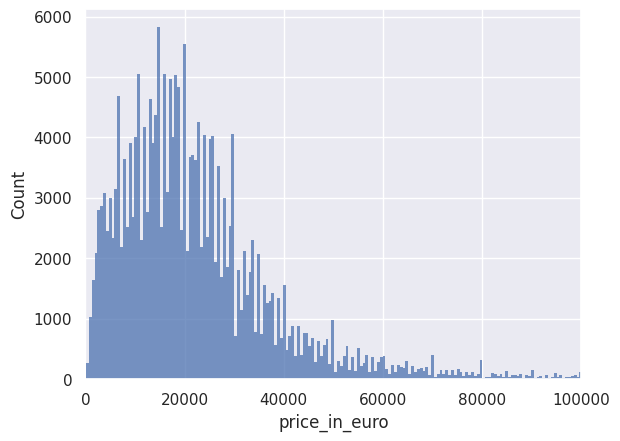

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=dataset, x='price_in_euro')
ax.set_xlim(0, 1e5)
plt.show()

Doel: Distributie van price_in_euro bekijken, met x-as beperkt tot €100.000.



In [ ]:
dataset.describe()

year  price_in_euro       power_kw       power_ps  \
count  222027.000000   2.220270e+05  222027.000000  222027.000000   
mean     2016.107104   2.509843e+04     124.221153     168.974805   
std         5.442007   3.481793e+04      69.200023      94.058765   
min      1995.000000   1.200000e+02      10.000000      14.000000   
25%      2013.000000   1.158000e+04      81.000000     110.000000   
50%      2017.000000   1.919000e+04     110.000000     150.000000   
75%      2020.000000   2.899000e+04     140.000000     190.000000   
max      2023.000000   5.890500e+06     735.000000     999.000000   

       fuel_consumption_l_100km  mileage_in_km  
count             222027.000000   2.220270e+05  
mean                   6.085987   8.788265e+04  
std                    2.582511   7.919024e+04  
min                    0.000000   0.000000e+00  
25%                    4.900000   2.700000e+04  
50%                    5.700000   7.100000e+04  
75%                    6.800000   1.300000e+05  
max                  173.000000   3.800000e+06

In [ ]:
dataset['brand'].mode()

0    volkswagen
Name: brand, dtype: object

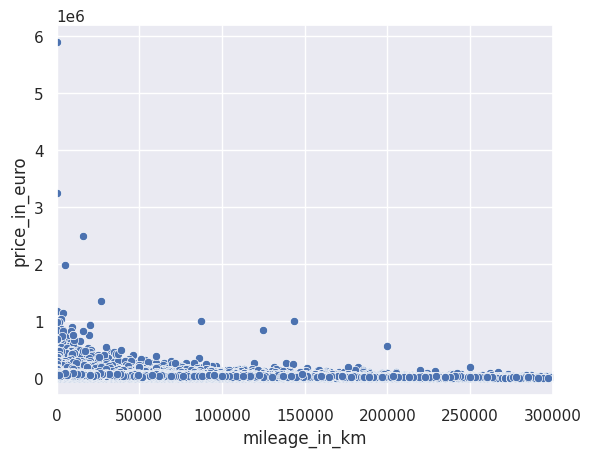

In [ ]:
# scatterplot mileage and price
fig, ax = plt.subplots()
sns.scatterplot(data=dataset, x='mileage_in_km', y='price_in_euro')
ax.set_xlim(0, 3e5)
plt.show()


# => non-linear relationship

Doel: Relatie tussen kilometerstand en prijs visualiseren.



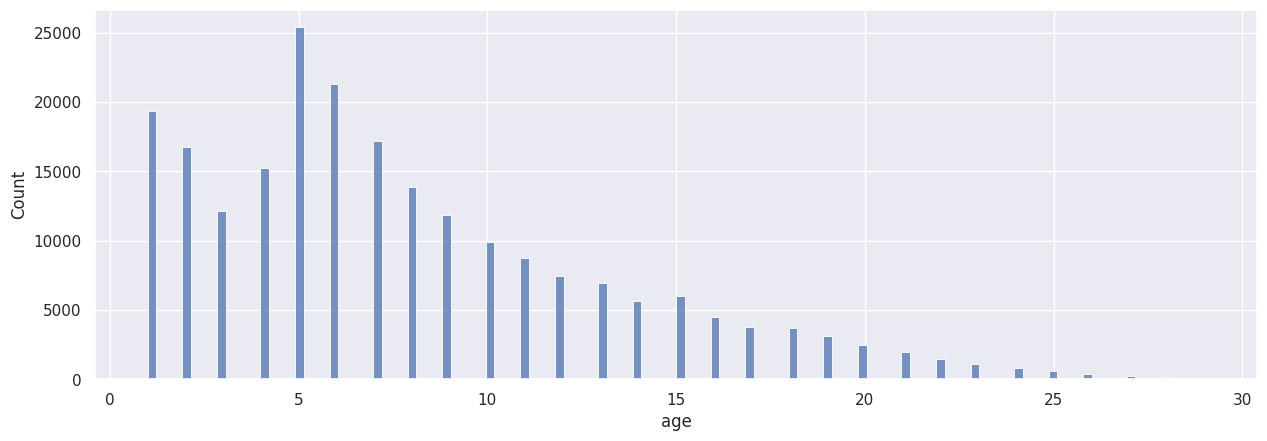

In [53]:
# distribution of the numerical features
# age

fig, ax = plt.subplots()
fig.set_figwidth(15)
sns.histplot(data=dataset, x='age')
plt.show()

Doel: Leeftijdsverdeling van de auto’s (moet later berekend worden).



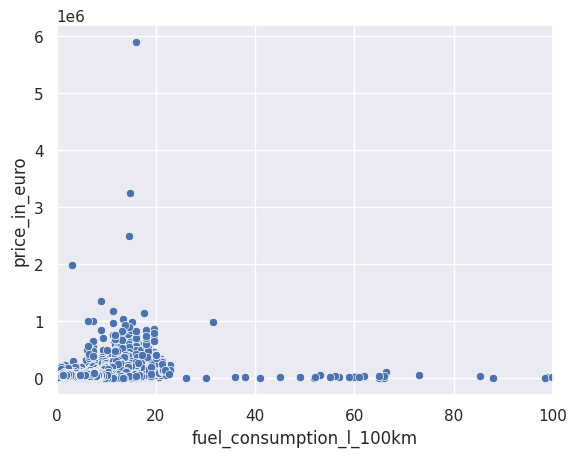

array([[1.        , 0.26156001],
       [0.26156001, 1.        ]])

In [ ]:
# scatterplot fuel consumption and price
fig, ax = plt.subplots()
sns.scatterplot(data=dataset, x='fuel_consumption_l_100km', y='price_in_euro')
ax.set_xlim(0, 100)
plt.show()


# correlation between fuel consumption and price in euro

np.corrcoef(dataset['fuel_consumption_l_100km'].values,dataset['price_in_euro'].values)

Doel: Bekijk of zuinigere auto’s over het algemeen duurder zijn.

python
Copy
Edit
np.corrcoef(dataset['fuel_consumption_l_100km'].values, dataset['price_in_euro'].values)
Doel: Numerieke berekening van correlatiecoëfficiënt.

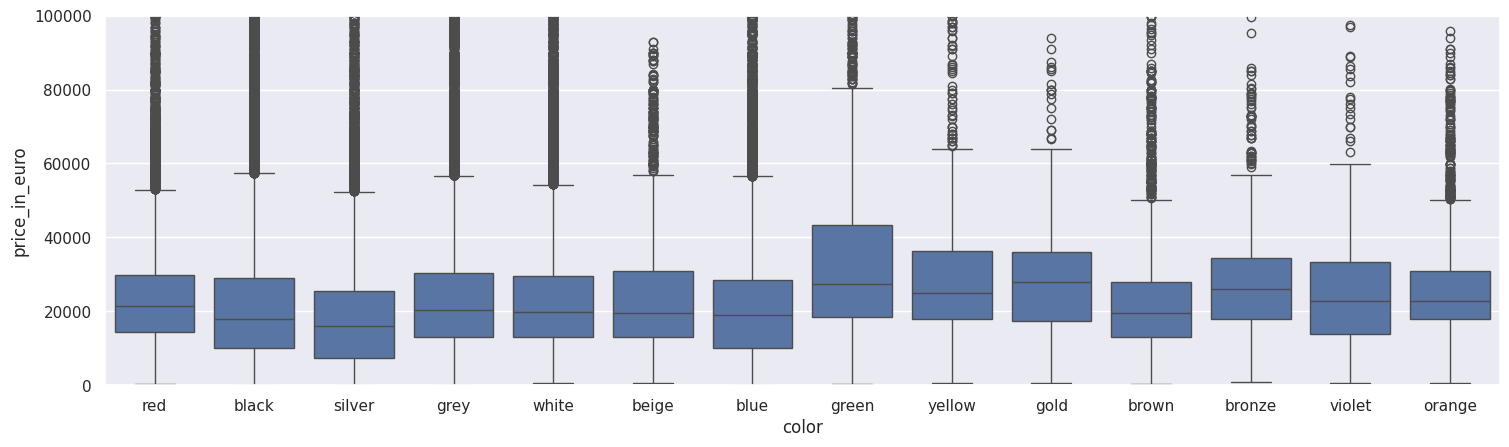

In [ ]:
# boxplot of price as a function of color
fig, ax = plt.subplots()
fig.set_figwidth(18)
sns.boxplot(data=dataset, y='price_in_euro',x='color')
ax.set_ylim(0, 1e5)
plt.show()

# Color has a slight influence on the car price.


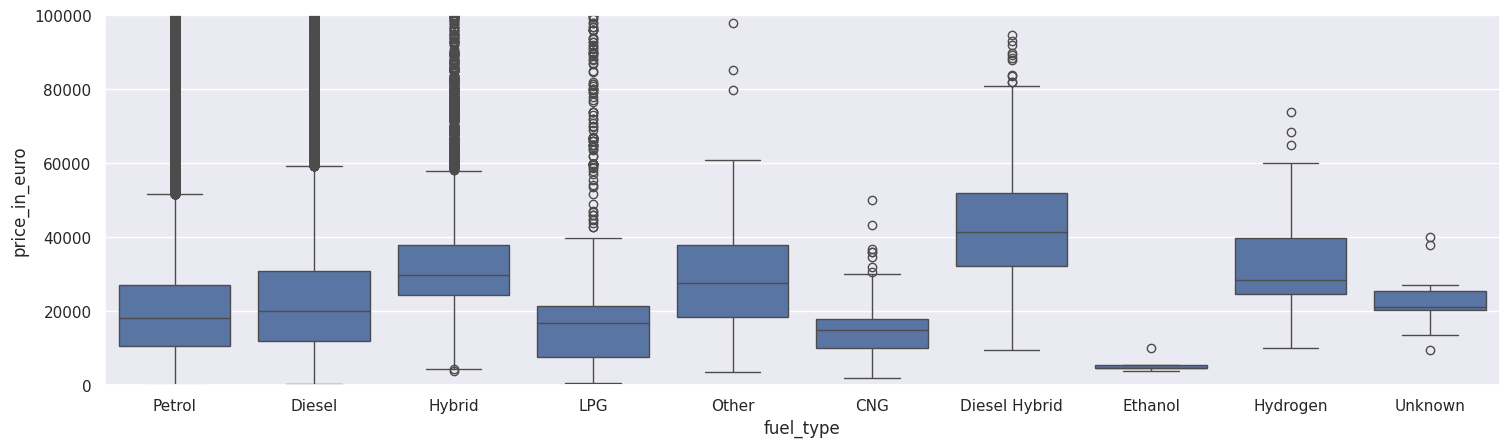

In [ ]:
# boxplot of the price per fuel type

fig, ax = plt.subplots()
fig.set_figwidth(18)
sns.boxplot(data=dataset, y='price_in_euro',x='fuel_type')
ax.set_ylim(0, 1e5)
plt.show()

# significant differences

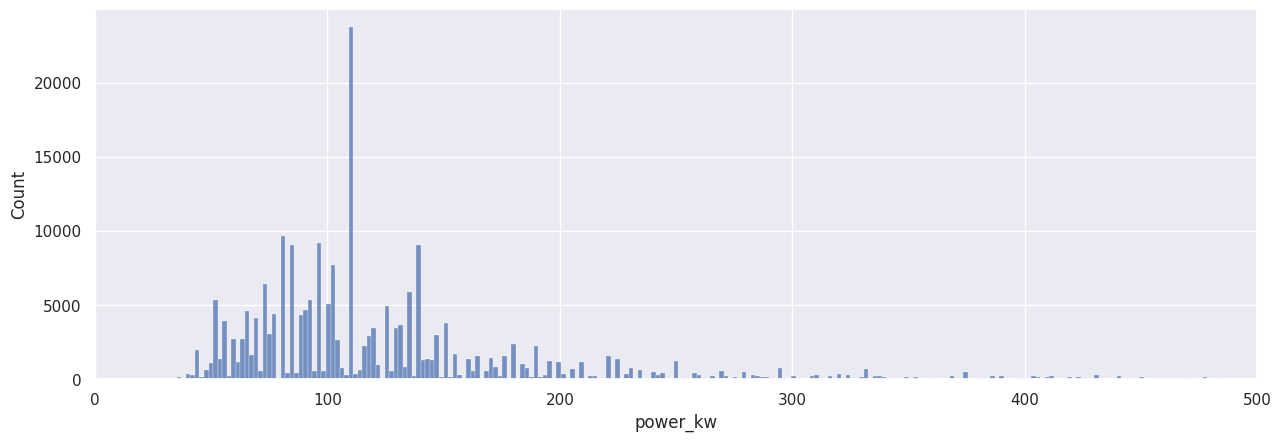

In [ ]:
# distribution of the numerical features
# power_kw

fig, ax = plt.subplots()
fig.set_figwidth(15)
sns.histplot(data=dataset, x='power_kw')
ax.set_xlim(0, 500)
plt.show()

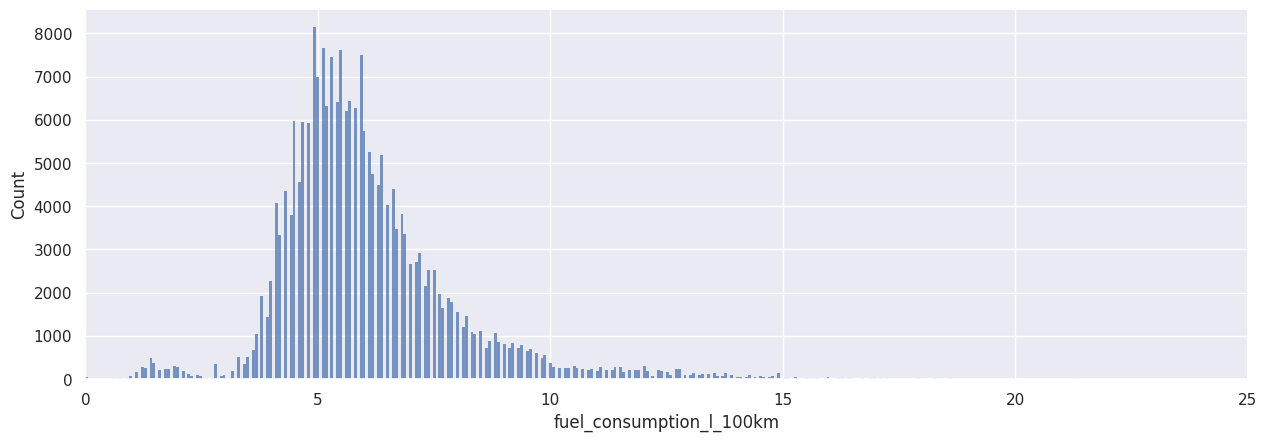

In [ ]:
# distribution of the numerical features
# fuel_consumption

fig, ax = plt.subplots()
fig.set_figwidth(15)
sns.histplot(data=dataset, x='fuel_consumption_l_100km')
ax.set_xlim(0, 25)
plt.show()

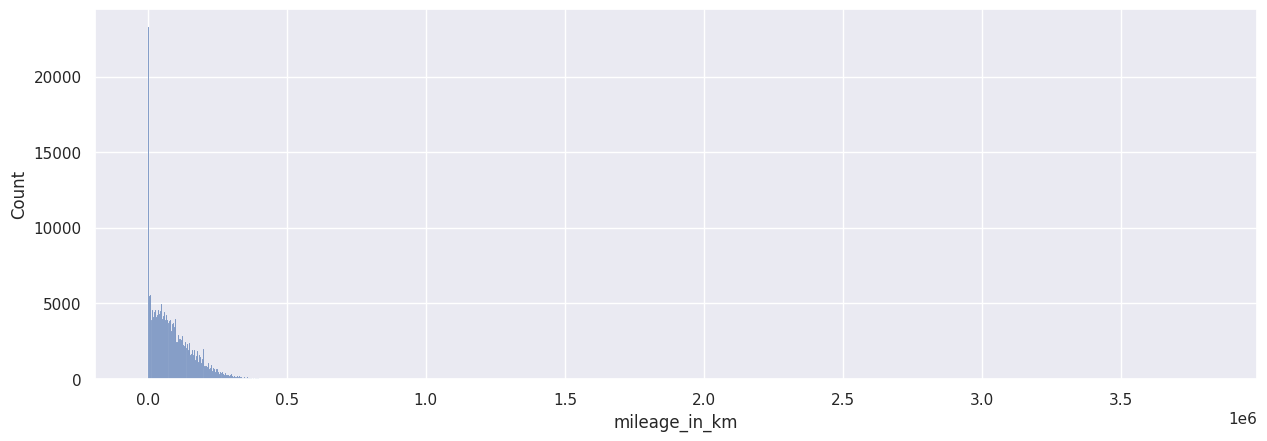

In [ ]:
# distribution of the numerical features
# mileage_in_km

fig, ax = plt.subplots()
fig.set_figwidth(15)
sns.histplot(data=dataset, x='mileage_in_km')

plt.show()

In [ ]:
# Drop brand from the dataset as this information is indirectly included in the car model

dataset.drop('brand',axis=1,inplace=True, errors='ignore')

# Drop power_ps as the power is already given by power_kw

dataset.drop('power_ps',axis=1,inplace=True,errors='ignore')

# Remove offer_description (nlp would be needed to extract information from this feature)

dataset.drop('offer_description', axis=1, inplace=True,errors='ignore')

dataset.head()

model  color  year  price_in_euro  power_kw transmission_type  \
0     Alfa Romeo GTV    red  1995           1300     148.0            Manual   
3  Alfa Romeo Spider  black  1995           4900     110.0            Manual   
4     Alfa Romeo 164    red  1996          17950     132.0            Manual   
5  Alfa Romeo Spider    red  1996           7900     110.0            Manual   
6     Alfa Romeo 145    red  1996           3500     110.0            Manual   

  fuel_type  fuel_consumption_l_100km  mileage_in_km  
0    Petrol                      10.9       160500.0  
3    Petrol                       9.5       189500.0  
4    Petrol                       7.2        96127.0  
5    Petrol                       9.5        47307.0  
6    Petrol                       8.8       230000.0

brand: Merk zit impliciet in model.

power_ps: Dubbel met power_kw.

offer_description: Tekstuele kolom, zonder verdere verwerking weggelaten.

In [ ]:
# convert year into age of the car and then drop the year column

dataset = dataset.assign(age = 2024-dataset['year'])
dataset.drop('year',axis=1,inplace=True,errors='ignore')
dataset.head()


model  color  price_in_euro  power_kw transmission_type  \
0     Alfa Romeo GTV    red           1300     148.0            Manual   
3  Alfa Romeo Spider  black           4900     110.0            Manual   
4     Alfa Romeo 164    red          17950     132.0            Manual   
5  Alfa Romeo Spider    red           7900     110.0            Manual   
6     Alfa Romeo 145    red           3500     110.0            Manual   

  fuel_type  fuel_consumption_l_100km  mileage_in_km  age  
0    Petrol                      10.9       160500.0   29  
3    Petrol                       9.5       189500.0   29  
4    Petrol                       7.2        96127.0   28  
5    Petrol                       9.5        47307.0   28  
6    Petrol                       8.8       230000.0   28

age: Nieuw afgeleide feature, huidige jaar (2024) minus bouwjaar.

Verwijderen year: Redundant na creatie age

In [ ]:
# one-hot encoding of the categorical features model, color, transmission_type, fuel_type

# standard scaling of the numerical features

ohe = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()



ct = make_column_transformer((ohe,['model','color','transmission_type','fuel_type']),(scaler,['power_kw','fuel_consumption_l_100km','mileage_in_km','age']),remainder='passthrough',verbose_feature_names_out=False)
encoded = ct.fit_transform(dataset)
enc_features = ct.get_feature_names_out()
dataset_enc = pd.DataFrame(data= encoded, columns=enc_features)

dataset_enc.head()


Thought for a couple of seconds


In dit blok gebeurt de volgende preprocessing stap: je zet categorische variabelen om in dummy-variabelen en je brengt numerieke variabelen op dezelfde schaal. Stap voor stap:

1. **Import en initialisatie van de transformers**

   ```python
   ohe = OneHotEncoder(sparse_output=False)
   scaler = StandardScaler()
   ```

   * `OneHotEncoder`: zet iedere categorie (zoals elk automodel, elke kleur, elke transmissie- en brandstoftype) om in afzonderlijke binaire kolommen.
   * `sparse_output=False`: zorgt dat de output een gewone NumPy-array wordt in plaats van een sparse matrix.
   * `StandardScaler`: schaalt alle numerieke kolommen zó dat ze een gemiddelde van 0 en een standaarddeviatie van 1 krijgen.

2. **Samenstellen van de kolom-transformatie**

   ```python
   ct = make_column_transformer(
       (ohe, ['model','color','transmission_type','fuel_type']),
       (scaler, ['power_kw','fuel_consumption_l_100km','mileage_in_km','age']),
       remainder='passthrough',
       verbose_feature_names_out=False
   )
   ```

   * `make_column_transformer` maakt een “pipeline” die voor elke groep kolommen de juiste transformer toepast:

     * Eerst `ohe` op de vier categorische kolommen.
     * Daarna `scaler` op de vier numerieke kolommen.
   * `remainder='passthrough'` betekent: alle overige kolommen (in dit geval alleen `price_in_euro`) worden ongemoeid gelaten en later wél meegegeven in de output.
   * `verbose_feature_names_out=False` geeft eenvoudigere kolomnamen (zonder het `ohe__`-prefix en met originele kolomnamen).

3. **Fit en transform**

   ```python
   encoded = ct.fit_transform(dataset)
   ```

   * `.fit_transform(...)`:

     1. Berekent eerst op de trainingsdata de benodigde parameters (bijv. welke categorieën er zijn, het gemiddelde en de std van elke numerieke kolom).
     2. Past vervolgens de encoding en scaling daadwerkelijk toe, en geeft een NumPy-array terug waarin alle originele kolommen zijn vervangen door de nieuwe, getransformeerde kolommen.

4. **Feature-namen terughalen en DataFrame maken**

   ```python
   enc_features = ct.get_feature_names_out()
   dataset_enc = pd.DataFrame(data=encoded, columns=enc_features)
   dataset_enc.head()
   ```

   * `get_feature_names_out()`: haalt de nieuwe kolomnamen op (één naam per dummy-variabele en per geschaalde kolom, plus de ‘passthrough’ kolom).
   * Met die namen maak je een nieuwe `DataFrame` zodat je weer netjes een tabel hebt met kolomnamen in plaats van een kale array.
   * `head()` toont de eerste rijen, zodat je kunt verifiëren dat alles er logisch uitziet.

**Waarom dit nodig is**

* Machine-learningmodellen kunnen doorgaans niet met tekst (strings) of verschillend geschaalde getallen overweg.
* Door één-hot encoding maak je van elke categorie een set van 0/1-variabelen.
* Door standaardscaling zorg je dat kenmerken zoals vermogen (kW), verbruik (l/100 km), kilometerstand en leeftijd in dezelfde range liggen, wat de convergentie en stabiliteit van veel modellen (zoals regressie, SVM, neural nets) ten goede komt.


One-hot encoding voor categorische kolommen.

Standard scaling voor numerieke kolommen (gemiddelde 0, std 1).

ColumnTransformer combineert deze bewerkingen netjes.



In [ ]:
# Import necessary libraries
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Import OneHotEncoder
from sklearn.compose import make_column_transformer # Import make_column_transformer


# ... (your existing code for data cleaning and preprocessing) ...

# one-hot encoding of the categorical features model, color, transmission_type, fuel_type

# standard scaling of the numerical features

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # handle_unknown='ignore' for new categories in test set
scaler = StandardScaler()



ct = make_column_transformer((ohe,['model','color','transmission_type','fuel_type']),(scaler,['power_kw','fuel_consumption_l_100km','mileage_in_km','age']),remainder='passthrough',verbose_feature_names_out=False)
encoded = ct.fit_transform(dataset)
enc_features = ct.get_feature_names_out()
dataset_enc = pd.DataFrame(data= encoded, columns=enc_features)

dataset_enc.head()

model_Alfa Romeo  model_Alfa Romeo 145  model_Alfa Romeo 146  \
0               0.0                   0.0                   0.0   
1               0.0                   0.0                   0.0   
2               0.0                   0.0                   0.0   
3               0.0                   0.0                   0.0   
4               0.0                   1.0                   0.0   

   model_Alfa Romeo 147  model_Alfa Romeo 155  model_Alfa Romeo 156  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   model_Alfa Romeo 159  model_Alfa Romeo 164  model_Alfa Romeo 166  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   1.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   model_Alfa Romeo 4C  ...  fuel_type_Hydrogen  fuel_type_LPG  \
0                  0.0  ...                 0.0            0.0   
1                  0.0  ...                 0.0            0.0   
2                  0.0  ...                 0.0            0.0   
3                  0.0  ...                 0.0            0.0   
4                  0.0  ...                 0.0            0.0   

   fuel_type_Other  fuel_type_Petrol  fuel_type_Unknown  power_kw  \
0              0.0               1.0                0.0  0.343626   
1              0.0               1.0                0.0 -0.205508   
2              0.0               1.0                0.0  0.112411   
3              0.0               1.0                0.0 -0.205508   
4              0.0               1.0                0.0 -0.205508   

   fuel_consumption_l_100km  mileage_in_km       age  price_in_euro  
0                  1.864087       0.917001  3.878560         1300.0  
1                  1.321977       1.283208  3.878560         4900.0  
2                  0.431369       0.104108  3.694804        17950.0  
3                  1.321977      -0.512383  3.694804         7900.0  
4                  1.050923       1.794636  3.694804         3500.0  

[5 rows x 1213 columns]

In [ ]:
# split into features and targets

y = dataset_enc['price_in_euro'].values
X = dataset_enc.drop('price_in_euro',axis=1).values

# split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Doel: Model trainen op 75% van de data

In [ ]:
lregmodel = LinearRegression()

lregmodel.fit(X_train,y_train)




LinearRegression()

In [ ]:
# Evaluation of the model on the test set

y_predicted = lregmodel.predict(X_test)

## Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

## Mean Squared Error
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,y_predicted)
print('MSE = ',MSE)

## coefficient of determination = r2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_predicted)

print('r2 score = ',r2)

### alternative for r2 score
r2 = lregmodel.score(X_test,y_test)
print('r2 score = ', r2)


# r2 score on the training set
r2 = lregmodel.score(X_train,y_train)
print('r2 score on training set = ',r2)



MAE =  5419.184546872529
MSE =  352538801.82470274
r2 score =  0.6801825411082657
r2 score =  0.6801825411082657
r2 score on training set =  0.703770283729588


MAE: Gemiddelde absolute afwijking.

MSE: Gemiddelde kwadratische afwijking.

R²: Verklaarde variantie.

In [ ]:
# L2 regularization: Ridge regression
lregmodel2 = Ridge(alpha=8,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train,y_train)
lregmodel2.score(X_test,y_test)

0.7028461992645341

In [ ]:
# L1 regularization: Lasso regression
lregmodel3 = Lasso(alpha=0.5,tol=0.0001,fit_intercept=True)
lregmodel3.fit(X_train,y_train)
lregmodel3.score(X_test,y_test)

0.6778474558039964

Doel: Minder overfitting door straf op grote coëfficiënten (L1 of L2).



In [ ]:

dataset.insert(0,'1/mileage',1/(dataset['mileage_in_km']+5))
dataset.insert(0,'1/consumption',1/(dataset['fuel_consumption_l_100km']+0.2))

Nieuwe features: Om niet-lineaire relaties (bijv. dalend effect) beter vast te leggen.



In [ ]:
ohe = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()



ct = make_column_transformer((ohe,['model','color','transmission_type','fuel_type']),(scaler,['power_kw','fuel_consumption_l_100km','mileage_in_km','age','1/consumption','1/mileage']),remainder='passthrough',verbose_feature_names_out=False)
encoded = ct.fit_transform(dataset)
enc_features = ct.get_feature_names_out()
dataset_enc = pd.DataFrame(data= encoded, columns=enc_features)

dataset_enc.head()

model_Alfa Romeo  model_Alfa Romeo 145  model_Alfa Romeo 146  \
0               0.0                   0.0                   0.0   
1               0.0                   0.0                   0.0   
2               0.0                   0.0                   0.0   
3               0.0                   0.0                   0.0   
4               0.0                   1.0                   0.0   

   model_Alfa Romeo 147  model_Alfa Romeo 155  model_Alfa Romeo 156  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   model_Alfa Romeo 159  model_Alfa Romeo 164  model_Alfa Romeo 166  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   1.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   model_Alfa Romeo 4C  ...  fuel_type_Other  fuel_type_Petrol  \
0                  0.0  ...              0.0               1.0   
1                  0.0  ...              0.0               1.0   
2                  0.0  ...              0.0               1.0   
3                  0.0  ...              0.0               1.0   
4                  0.0  ...              0.0               1.0   

   fuel_type_Unknown  power_kw  fuel_consumption_l_100km  mileage_in_km  \
0                0.0  0.343626                  1.864087       0.917001   
1                0.0 -0.205508                  1.321977       1.283208   
2                0.0  0.112411                  0.431369       0.104108   
3                0.0 -0.205508                  1.321977      -0.512383   
4                0.0 -0.205508                  1.050923       1.794636   

        age  1/consumption  1/mileage  price_in_euro  
0  3.878560      -0.888059  -0.242381         1300.0  
1  3.878560      -0.753900  -0.242435         4900.0  
2  3.694804      -0.423293  -0.242146        17950.0  
3  3.694804      -0.753900  -0.241542         7900.0  
4  3.694804      -0.671168  -0.242487         3500.0  

[5 rows x 1215 columns]

In [ ]:
# split into features and targets

y = dataset_enc['price_in_euro'].values
X = dataset_enc.drop('price_in_euro',axis=1).values

# split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# L2 regularization: Ridge regression
lregmodel4 = Ridge(alpha=6,tol=0.0001,fit_intercept=True)
lregmodel4.fit(X_train,y_train)
lregmodel4.score(X_test,y_test)

# => slight improvement

0.7038739857511096

Resultaat: Kleine verbetering in R².



In [ ]:
# Cell: Predict the price of a new car listing (with dummy price column)

import pandas as pd
import numpy as np

# 1) Define the raw features for your sample car
sample_car = pd.DataFrame([{
    'model': 'Alfa Romeo GTV',
    'color': 'silver',
    'transmission_type': 'Manual',
    'fuel_type': 'Petrol',
    'year': 2019,
    'power_kw': 85,
    'fuel_consumption_l_100km': 6.5,
    'mileage_in_km': 50000
}])

# 2) Repeat your feature engineering
current_year = 2024
sample_car['age'] = current_year - sample_car['year']
sample_car.drop('year', axis=1, inplace=True)

sample_car['1/mileage']     = 1.0 / (sample_car['mileage_in_km'] + 5)
sample_car['1/consumption'] = 1.0 / (sample_car['fuel_consumption_l_100km'] + 0.2)

# 3) Add a dummy price_in_euro column so ct.transform() sees the same columns as at fit time
sample_car['price_in_euro'] = 0.0

# 4) Transform
sample_enc_full = ct.transform(sample_car)

# 5) Drop that dummy passthrough column before predicting
#    (it’s the last column in the output)
sample_enc = sample_enc_full[:, :-1]

# 6) Predict with your final model
pred_price = lregmodel4.predict(sample_enc)

print(f"Predicted price: €{pred_price[0]:,.2f}")


Predicted price: €23,504.14


Doel: Nieuwe observatie door volledige preprocessing pipeline halen en uiteindelijk voorspelling met het beste model.

